In [1]:
!pip install mlxtend

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
#Load the Dataset
df = pd.read_excel("Online retail.xlsx", header=None)

In [ ]:
#Print Few Columns
print(df.head())

#print shape
df.shape

                                                   0
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...


(7501, 1)

In [ ]:
#check Null values
print(df.isnull().sum())

0    0
dtype: int64


In [ ]:
#Convert Data to List
item_list = df[0].apply(lambda x: str(x).split(',')).tolist()
print(item_list)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

In [ ]:
#Create Boolean Table
te= TransactionEncoder()
te_ary = te.fit_transform(item_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [ ]:
#Search Frequent Items

frequent = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [10]:
rules = association_rules(frequent, metric="lift", min_threshold=1)

In [11]:
print("\nRules")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Rules
       antecedents      consequents   support  confidence      lift
0  (mineral water)        (avocado)  0.011598    0.048658  1.459926
1        (avocado)  (mineral water)  0.011598    0.348000  1.459926
2        (burgers)           (cake)  0.011465    0.131498  1.622319
3           (cake)        (burgers)  0.011465    0.141447  1.622319
4        (burgers)      (chocolate)  0.017064    0.195719  1.194537
5      (chocolate)        (burgers)  0.017064    0.104150  1.194537
6        (burgers)           (eggs)  0.028796    0.330275  1.837830
7           (eggs)        (burgers)  0.028796    0.160237  1.837830
8        (burgers)   (french fries)  0.021997    0.252294  1.476173
9   (french fries)        (burgers)  0.021997    0.128705  1.476173


In [12]:
rules_output=rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules_output.to_excel("rules_output.xlsx", index=False)

In [13]:
top = rules.sort_values(by = 'lift', ascending=False).head(10)

In [14]:
labels = [f"{', '.join(a)} → {', '.join(c)}" for a, c in zip(top['antecedents'], top['consequents'])]

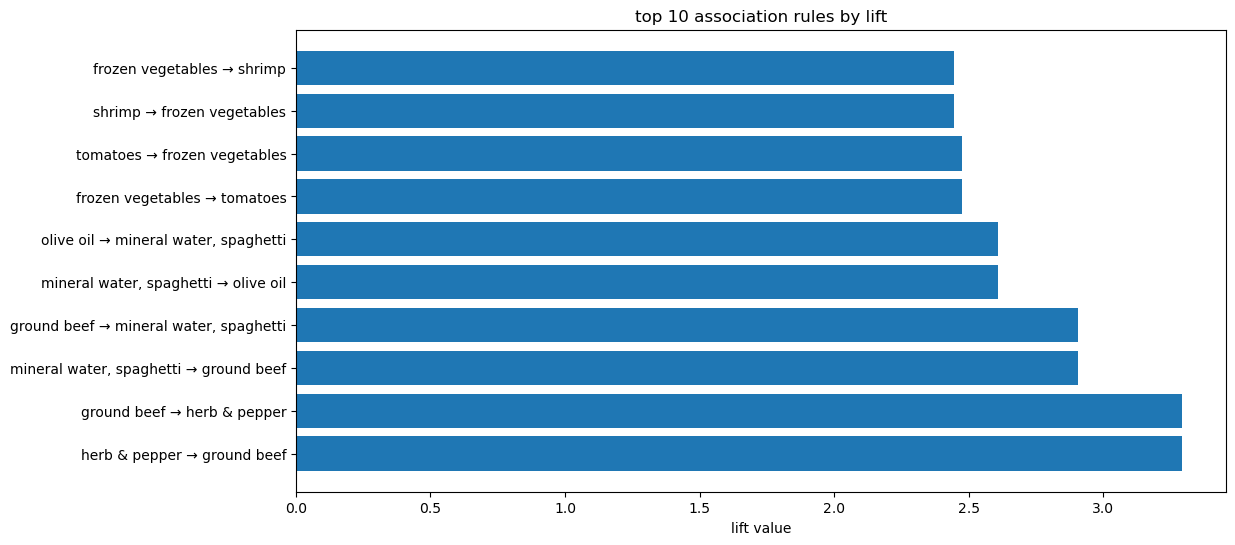

In [15]:
plt.figure(figsize=(12,6))
plt.barh(labels, top['lift'])
plt.xlabel("lift value")
plt.title("top 10 association rules by lift")

plt.show()